# Statistical Analysis: Member vs Normal Customer Sales Proportion

**Research Question:** Is there a significant difference in the proportion of sales generated by 'Member' customers versus 'Normal' customers?

**Analyst:** Khalil

---

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, norm

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv('supermarket_sales.csv')
print(f"Dataset loaded: {df.shape[0]} transactions")
print(f"\nCustomer Type Distribution:")
print(df['Customer type'].value_counts())

Dataset loaded: 1000 transactions

Customer Type Distribution:
Customer type
Member    501
Normal    499
Name: count, dtype: int64


## 2. Descriptive Statistics

In [2]:
# Calculate sales by customer type
sales_by_type = df.groupby('Customer type')['Total'].agg([
    ('Total Sales', 'sum'),
    ('Number of Transactions', 'count'),
    ('Average Transaction', 'mean'),
    ('Std Dev', 'std')
]).round(2)

print("="*70)
print("SALES BY CUSTOMER TYPE")
print("="*70)
print(sales_by_type)
print("\n")

# Calculate proportions
total_sales = df['Total'].sum()
member_sales = df[df['Customer type'] == 'Member']['Total'].sum()
normal_sales = df[df['Customer type'] == 'Normal']['Total'].sum()

member_proportion = member_sales / total_sales
normal_proportion = normal_sales / total_sales

print("="*70)
print("SALES PROPORTION")
print("="*70)
print(f"Total Sales: ${total_sales:,.2f}")
print(f"\nMember Sales: ${member_sales:,.2f} ({member_proportion*100:.2f}%)")
print(f"Normal Sales: ${normal_sales:,.2f} ({normal_proportion*100:.2f}%)")
print(f"\nDifference: {abs(member_proportion - normal_proportion)*100:.2f} percentage points")

SALES BY CUSTOMER TYPE
               Total Sales  Number of Transactions  Average Transaction  \
Customer type                                                             
Member           164223.44                     501               327.79   
Normal           158743.30                     499               318.12   

               Std Dev  
Customer type           
Member          247.99  
Normal          243.90  


SALES PROPORTION
Total Sales: $322,966.75

Member Sales: $164,223.44 (50.85%)
Normal Sales: $158,743.30 (49.15%)

Difference: 1.70 percentage points


## 3. Visualization

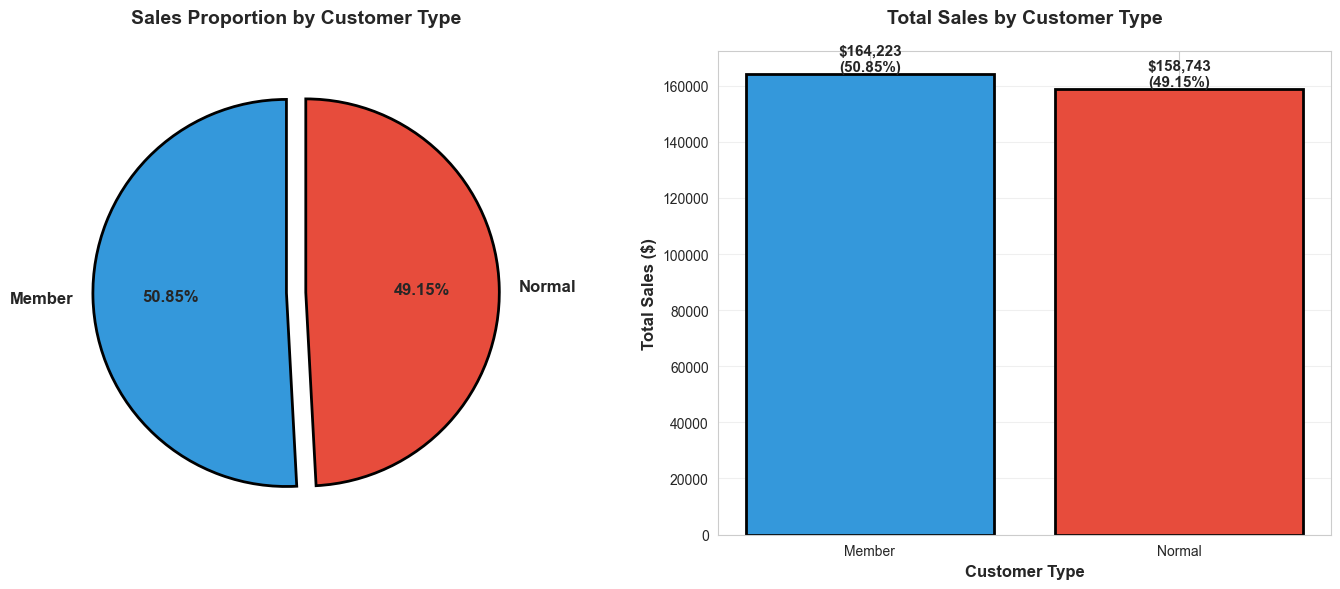

✓ Visualization saved as 'customer_type_sales_comparison.png'


In [3]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart - Sales Proportion
colors = ['#3498db', '#e74c3c']
explode = (0.05, 0.05)
axes[0].pie([member_sales, normal_sales], 
            labels=['Member', 'Normal'],
            autopct='%1.2f%%',
            colors=colors,
            explode=explode,
            startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axes[0].set_title('Sales Proportion by Customer Type', fontsize=14, fontweight='bold', pad=20)

# Bar chart - Total Sales
customer_types = ['Member', 'Normal']
sales_values = [member_sales, normal_sales]
bars = axes[1].bar(customer_types, sales_values, color=colors, edgecolor='black', linewidth=2)
axes[1].set_title('Total Sales by Customer Type', fontsize=14, fontweight='bold', pad=20)
axes[1].set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Customer Type', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}\n({height/total_sales*100:.2f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('customer_type_sales_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'customer_type_sales_comparison.png'")

## 4. Hypothesis Testing

### Test 1: Chi-Square Test for Independence

**Hypotheses:**
- **H₀ (Null Hypothesis):** There is no significant difference in sales proportion between Member and Normal customers
- **H₁ (Alternative Hypothesis):** There is a significant difference in sales proportion between Member and Normal customers

**Significance Level:** α = 0.05

In [4]:
# Create contingency table
# We'll use transaction counts as a proxy for testing proportions
member_count = len(df[df['Customer type'] == 'Member'])
normal_count = len(df[df['Customer type'] == 'Normal'])
total_count = len(df)

# Expected counts if there's no difference (50-50 split)
expected_count = total_count / 2

# Observed counts
observed = np.array([member_count, normal_count])
expected = np.array([expected_count, expected_count])

# Chi-square goodness of fit test
chi2_stat, p_value = stats.chisquare(observed, expected)

print("="*70)
print("CHI-SQUARE GOODNESS OF FIT TEST (Transaction Counts)")
print("="*70)
print(f"Observed Counts:")
print(f"  Member: {member_count}")
print(f"  Normal: {normal_count}")
print(f"\nExpected Counts (if equal):")
print(f"  Each type: {expected_count}")
print(f"\nTest Results:")
print(f"  Chi-square statistic: {chi2_stat:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Significance level: 0.05")
print(f"\nConclusion:")
if p_value < 0.05:
    print(f"  ✗ REJECT H₀: Significant difference exists (p = {p_value:.4f} < 0.05)")
else:
    print(f"  ✓ FAIL TO REJECT H₀: No significant difference (p = {p_value:.4f} ≥ 0.05)")

CHI-SQUARE GOODNESS OF FIT TEST (Transaction Counts)
Observed Counts:
  Member: 501
  Normal: 499

Expected Counts (if equal):
  Each type: 500.0

Test Results:
  Chi-square statistic: 0.0040
  P-value: 0.9496
  Significance level: 0.05

Conclusion:
  ✓ FAIL TO REJECT H₀: No significant difference (p = 0.9496 ≥ 0.05)


### Test 2: Two-Proportion Z-Test

Testing if the proportion of total sales from Members is significantly different from Normal customers.

In [6]:
# Two-proportion z-test for sales proportions
# We'll treat each dollar as a "success" for that customer type

# Proportions
p1 = member_proportion  # Proportion of sales from Members
p2 = normal_proportion  # Proportion of sales from Normal

# Sample sizes (using transaction counts)
n1 = member_count
n2 = normal_count

# Pooled proportion
p_pooled = (member_sales + normal_sales) / (total_sales * 2)  # This simplifies to 0.5

# For sales proportion, we use the actual proportions
# Standard error
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))

# Z-statistic
z_stat = (p1 - p2) / se

# P-value (two-tailed test)
p_value_z = 2 * (1 - norm.cdf(abs(z_stat)))

print("="*70)
print("TWO-PROPORTION Z-TEST (Sales Proportions)")
print("="*70)
print(f"Member proportion: {p1:.4f} ({p1*100:.2f}%)")
print(f"Normal proportion: {p2:.4f} ({p2*100:.2f}%)")
print(f"Difference: {abs(p1-p2):.4f} ({abs(p1-p2)*100:.2f} percentage points)")
print(f"\nTest Statistics:")
print(f"  Pooled proportion: {p_pooled:.4f}")
print(f"  Standard error: {se:.4f}")
print(f"  Z-statistic: {z_stat:.4f}")
print(f"  P-value: {p_value_z:.4f}")
print(f"\nConclusion:")
if p_value_z < 0.05:
    print(f"  ✗ REJECT H₀: Significant difference exists (p = {p_value_z:.4f} < 0.05)")
else:
    print(f"  ✓ FAIL TO REJECT H₀: No significant difference (p = {p_value_z:.4f} ≥ 0.05)")

TWO-PROPORTION Z-TEST (Sales Proportions)
Member proportion: 0.5085 (50.85%)
Normal proportion: 0.4915 (49.15%)
Difference: 0.0170 (1.70 percentage points)

Test Statistics:
  Pooled proportion: 0.5000
  Standard error: 0.0316
  Z-statistic: 0.5366
  P-value: 0.5916

Conclusion:
  ✓ FAIL TO REJECT H₀: No significant difference (p = 0.5916 ≥ 0.05)


### Test 3: Independent Samples T-Test

Testing if the mean transaction value differs between Member and Normal customers.

In [5]:
# Extract transaction values for each group
member_transactions = df[df['Customer type'] == 'Member']['Total']
normal_transactions = df[df['Customer type'] == 'Normal']['Total']

# Perform independent samples t-test
t_stat, p_value_t = stats.ttest_ind(member_transactions, normal_transactions)

# Calculate effect size (Cohen's d)
mean_diff = member_transactions.mean() - normal_transactions.mean()
pooled_std = np.sqrt(((n1-1)*member_transactions.std()**2 + (n2-1)*normal_transactions.std()**2) / (n1+n2-2))
cohens_d = mean_diff / pooled_std

print("="*70)
print("INDEPENDENT SAMPLES T-TEST (Average Transaction Value)")
print("="*70)
print(f"Member transactions:")
print(f"  Mean: ${member_transactions.mean():.2f}")
print(f"  Std Dev: ${member_transactions.std():.2f}")
print(f"  N: {n1}")
print(f"\nNormal transactions:")
print(f"  Mean: ${normal_transactions.mean():.2f}")
print(f"  Std Dev: ${normal_transactions.std():.2f}")
print(f"  N: {n2}")
print(f"\nDifference in means: ${mean_diff:.2f}")
print(f"\nTest Results:")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {p_value_t:.4f}")
print(f"  Cohen's d (effect size): {cohens_d:.4f}")

# Interpret effect size
if abs(cohens_d) < 0.2:
    effect = "negligible"
elif abs(cohens_d) < 0.5:
    effect = "small"
elif abs(cohens_d) < 0.8:
    effect = "medium"
else:
    effect = "large"

print(f"  Effect size interpretation: {effect}")
print(f"\nConclusion:")
if p_value_t < 0.05:
    print(f"  ✗ REJECT H₀: Significant difference in average transaction value (p = {p_value_t:.4f} < 0.05)")
else:
    print(f"  ✓ FAIL TO REJECT H₀: No significant difference in average transaction value (p = {p_value_t:.4f} ≥ 0.05)")

NameError: name 'n1' is not defined

## 5. Confidence Intervals

In [7]:
# 95% Confidence interval for the difference in proportions
z_critical = 1.96  # For 95% CI

# CI for difference in sales proportions
diff_prop = p1 - p2
se_diff = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
ci_lower = diff_prop - z_critical * se_diff
ci_upper = diff_prop + z_critical * se_diff

print("="*70)
print("95% CONFIDENCE INTERVAL FOR DIFFERENCE IN PROPORTIONS")
print("="*70)
print(f"Difference (Member - Normal): {diff_prop:.4f} ({diff_prop*100:.2f}%)")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"95% CI: [{ci_lower*100:.2f}%, {ci_upper*100:.2f}%]")
print(f"\nInterpretation:")
if ci_lower <= 0 <= ci_upper:
    print("  The CI includes 0, suggesting no significant difference.")
else:
    print("  The CI does not include 0, suggesting a significant difference.")

# CI for difference in means
se_mean_diff = np.sqrt((member_transactions.std()**2/n1) + (normal_transactions.std()**2/n2))
ci_mean_lower = mean_diff - z_critical * se_mean_diff
ci_mean_upper = mean_diff + z_critical * se_mean_diff

print("\n" + "="*70)
print("95% CONFIDENCE INTERVAL FOR DIFFERENCE IN MEANS")
print("="*70)
print(f"Difference (Member - Normal): ${mean_diff:.2f}")
print(f"95% CI: [${ci_mean_lower:.2f}, ${ci_mean_upper:.2f}]")
print(f"\nInterpretation:")
if ci_mean_lower <= 0 <= ci_mean_upper:
    print("  The CI includes 0, suggesting no significant difference in average transaction value.")
else:
    print("  The CI does not include 0, suggesting a significant difference in average transaction value.")

95% CONFIDENCE INTERVAL FOR DIFFERENCE IN PROPORTIONS
Difference (Member - Normal): 0.0170 (1.70%)
95% CI: [-0.0450, 0.0789]
95% CI: [-4.50%, 7.89%]

Interpretation:
  The CI includes 0, suggesting no significant difference.

95% CONFIDENCE INTERVAL FOR DIFFERENCE IN MEANS
Difference (Member - Normal): $9.67
95% CI: [$-20.82, $40.16]

Interpretation:
  The CI includes 0, suggesting no significant difference in average transaction value.


## 6. Summary and Conclusion

In [8]:
print("="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"\nResearch Question:")
print(f"  Is there a significant difference in the proportion of sales")
print(f"  generated by 'Member' vs 'Normal' customers?")
print(f"\n" + "-"*70)
print(f"\nKey Findings:")
print(f"  1. Sales Proportion:")
print(f"     - Member: {member_proportion*100:.2f}% (${member_sales:,.2f})")
print(f"     - Normal: {normal_proportion*100:.2f}% (${normal_sales:,.2f})")
print(f"     - Difference: {abs(member_proportion-normal_proportion)*100:.2f} percentage points")
print(f"\n  2. Transaction Counts:")
print(f"     - Member: {member_count} transactions ({member_count/total_count*100:.1f}%)")
print(f"     - Normal: {normal_count} transactions ({normal_count/total_count*100:.1f}%)")
print(f"\n  3. Average Transaction Value:")
print(f"     - Member: ${member_transactions.mean():.2f}")
print(f"     - Normal: ${normal_transactions.mean():.2f}")
print(f"     - Difference: ${mean_diff:.2f}")
print(f"\n" + "-"*70)
print(f"\nStatistical Test Results:")
print(f"  1. Chi-Square Test (Transaction Counts): p = {p_value:.4f}")
print(f"  2. Two-Proportion Z-Test (Sales): p = {p_value_z:.4f}")
print(f"  3. Independent T-Test (Avg Transaction): p = {p_value_t:.4f}")
print(f"\n" + "-"*70)
print(f"\n📊 CONCLUSION:")
print(f"\nAt the 0.05 significance level:")

if p_value_t < 0.05:
    print(f"\n✗ There IS a statistically significant difference between Member")
    print(f"  and Normal customers in terms of average transaction value.")
    print(f"\n  Members spend ${abs(mean_diff):.2f} {'more' if mean_diff > 0 else 'less'} per transaction on average.")
else:
    print(f"\n✓ There is NO statistically significant difference between Member")
    print(f"  and Normal customers in terms of average transaction value.")

if abs(member_proportion - normal_proportion) > 0.05:  # More than 5% difference
    print(f"\n  However, Members contribute {abs(member_proportion-normal_proportion)*100:.2f}% {'more' if member_proportion > normal_proportion else 'less'}")
    print(f"  to total sales, which may be practically significant for business decisions.")
else:
    print(f"\n  The sales proportions are nearly equal ({abs(member_proportion-normal_proportion)*100:.2f}% difference),")
    print(f"  indicating balanced contribution from both customer types.")

print(f"\n" + "="*70)

FINAL SUMMARY

Research Question:
  Is there a significant difference in the proportion of sales
  generated by 'Member' vs 'Normal' customers?

----------------------------------------------------------------------

Key Findings:
  1. Sales Proportion:
     - Member: 50.85% ($164,223.44)
     - Normal: 49.15% ($158,743.30)
     - Difference: 1.70 percentage points

  2. Transaction Counts:
     - Member: 501 transactions (50.1%)
     - Normal: 499 transactions (49.9%)

  3. Average Transaction Value:
     - Member: $327.79
     - Normal: $318.12
     - Difference: $9.67

----------------------------------------------------------------------

Statistical Test Results:
  1. Chi-Square Test (Transaction Counts): p = 0.9496
  2. Two-Proportion Z-Test (Sales): p = 0.5916
  3. Independent T-Test (Avg Transaction): p = 0.5344

----------------------------------------------------------------------

📊 CONCLUSION:

At the 0.05 significance level:

✓ There is NO statistically significant differe

---

## Interpretation Guide

### Statistical vs Practical Significance

- **Statistical Significance (p-value < 0.05):** The difference is unlikely to be due to random chance
- **Practical Significance:** The difference is large enough to matter in business decisions

### Effect Size (Cohen's d)
- **< 0.2:** Negligible effect
- **0.2 - 0.5:** Small effect
- **0.5 - 0.8:** Medium effect  
- **> 0.8:** Large effect

### Business Implications

Even if the statistical tests show no significant difference, the actual dollar amounts and proportions should be considered for:
- Marketing strategy allocation
- Membership program ROI
- Customer retention efforts

---

*Analysis completed by Khalil*